# Variogram Models 

In [38]:
import os                                                 # to set current working directory 
import numpy as np                                        # arrays and matrix math
import pandas as pd                                       # DataFrames
import matplotlib.pyplot as plt                           # plotting
import geostatspy.geostats as geostats
import geostatspy.GSLIB as GSLIB

In [2]:
#df = pd.read_csv("sample_data_MV_biased.csv")             # read a .csv file in as a DataFrame
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv") # from Dr. Pyrcz's GitHub repo
df.describe()                                             # summary statistics 
df = df.sample(50)                                        # extract 50 samples
df = df.reset_index()                                     # reset the record index 
df['logPerm'] = np.log(df['Perm'].values)
df.head()

,index,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,logPerm
0,164,266,180.0,359.0,0.0,0.110769,2.269660,4377.317804,0.819630
1,120,197,670.0,779.0,1.0,0.132134,6.435518,4114.122256,1.861832
2,136,220,730.0,239.0,1.0,0.130362,7.503464,4567.867914,2.015365
3,18,27,400.0,900.0,1.0,0.158800,174.258300,4101.371674,5.160539
4,98,160,650.0,539.0,0.0,0.113623,8.442675,5370.721763,2.133299


In [3]:
geostats.nscore                

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

In [4]:
#Transform to Gaussian by Facies
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity') # nscore transform for all facies porosity 
df['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df, 'Perm')  # nscore transform for all facies permeability

In [5]:
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=60.0,hmaj1=300,hmin1=300)
vario

{'nug': 0.0,
 'nst': 1,
 'it1': 3,
 'cc1': 1.0,
 'azi1': 60.0,
 'hmaj1': 300,
 'hmin1': 300,
 'it2': 1,
 'cc2': 0,
 'azi2': 0,
 'hmaj2': 0,
 'hmin2': 0}

In [6]:
tmin = -9999.; tmax = 9999.                             # no trimming 
lag_dist = 100.0; lag_tol = 100.0; nlag = 2;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
bandh = 9999.9; atol = 22.5                             # no bandwidth, directional variograms
isill = 1                                               # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]           # directions in azimuth to consider

## Variogram testing and Summaries
nug - nugget effect contribution to sill

nst - number of nested structures (1 or 2)

it - type for this nested structure (1 - spherical, 2 - exponential, 3 - Gaussian)

cc - contribution of each nested structure (contributions + nugget must sum to the sill)

azi - the azimuth for this nested structure of the major direction, the minor is orthogonal

hmaj - the range for this nested structure in the major direction

hmin - the range for this nested structure in the minor direction

In [7]:
tmin = -9999.; tmax = 9999.                             # no trimming 
lag_dist = 100.0; lag_tol = 100.0; nlag = 7;            # maximum lag is 700m and tolerance > 1/2 lag distance for smoothing
bandh = 9999.9; atol = 22.5                             # no bandwidth, directional variograms
isill = 1                                               # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]           # directions in azimuth to consider

For each Variogram we will demonstrate how each variogram impacts the comparison between the X(m) and y(m) distances with porosity values at each location ranging from 0.05 - 0.25. These can be used to understand how scaling data may have outliers. As of rightnow, these simulations are non-scaled

### Variogram: 0.2


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1336
                 Weighted Variance             = 0.0009
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0421 (close to 0.0?)
                                   variance = 0.9614 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
        

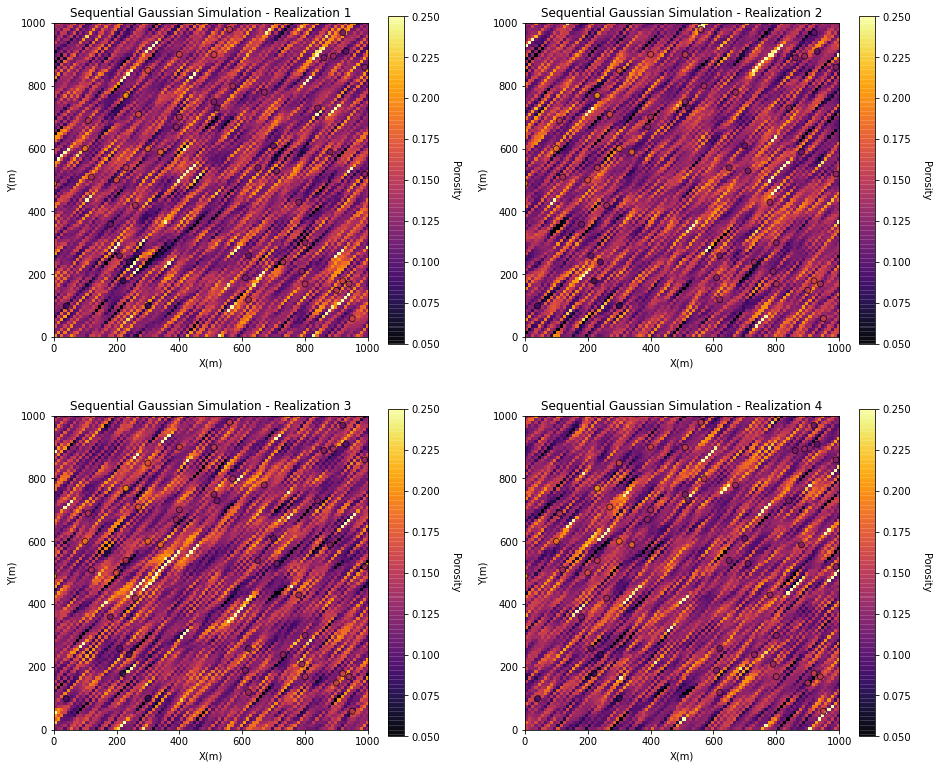

In [8]:
# Demonstration of Multiple Realizations - Short Continuity
# For all it types will be 3 for Guassian azi = 60, hmaj = hmin1 = 300.
# Variogram 0.2
#nlag = 2
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 1000; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45,hmaj1=100,hmin1=1)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0589 (close to 0.0?)
                                   variance = 1.0408 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
        

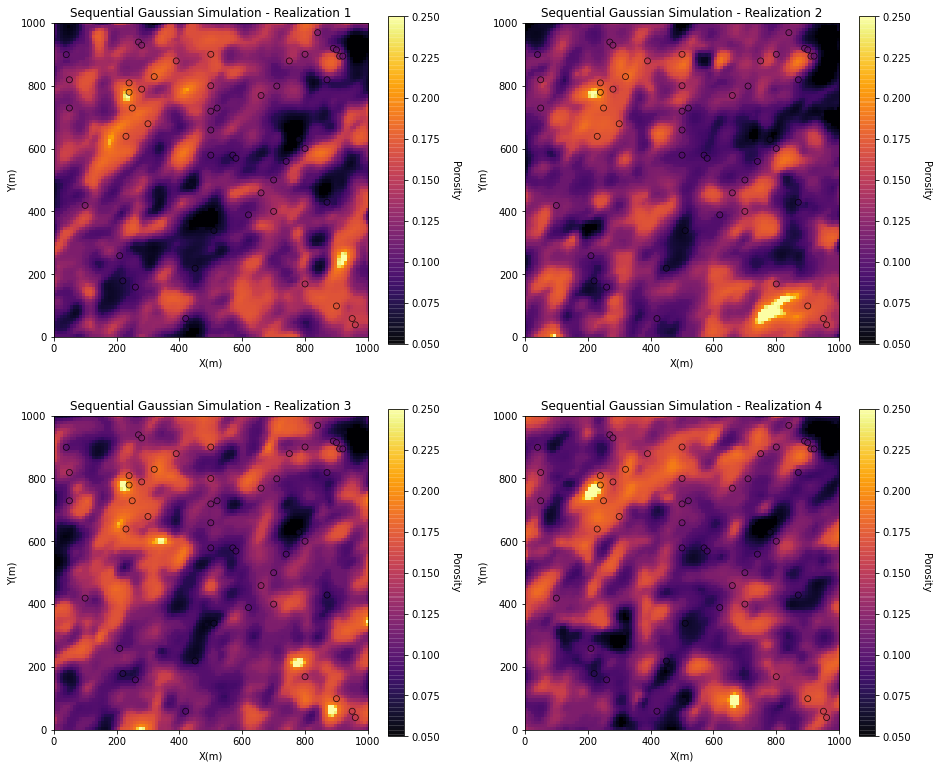

In [9]:
# Demonstration of Multiple Realizations - Long Continuity
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 20; radius = 100; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45,hmaj1=150,hmin1=100)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

## Variogram 0.4


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0508 (close to 0.0?)
                                   variance = 1.0865 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
        

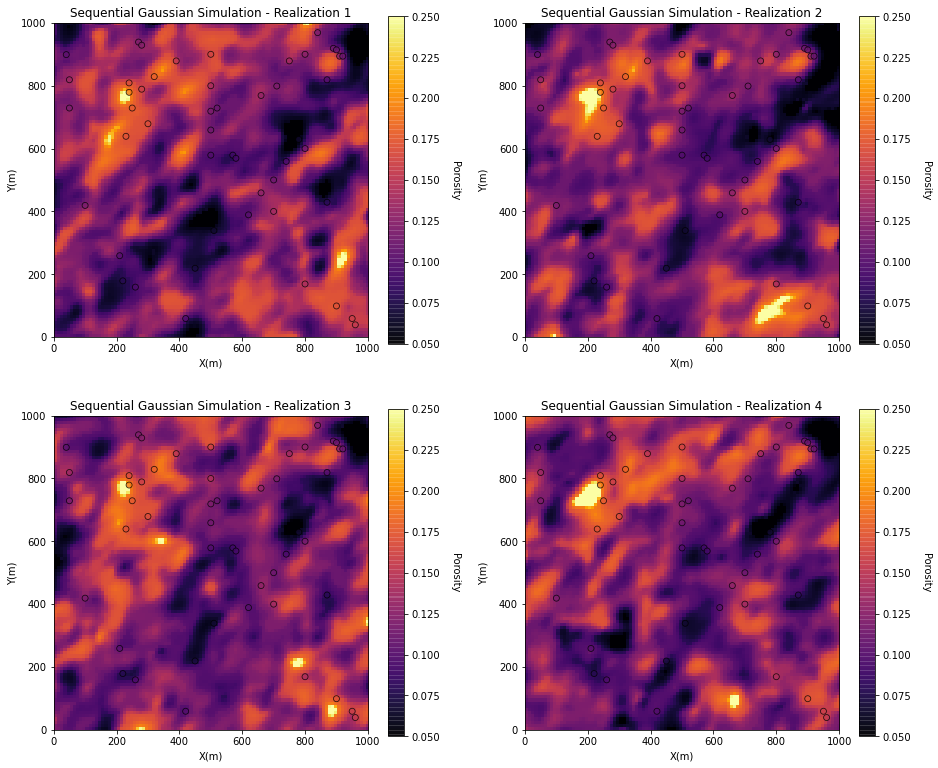

In [12]:
# Demonstration of Multiple Realizations - Short Continuity
# azi = 45, hmaj = 450 hmin1 = 200
# Variogram 0.4
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 300; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45.0,hmaj1=150,hmin1=100)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0589 (close to 0.0?)
                                   variance = 1.0408 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
        

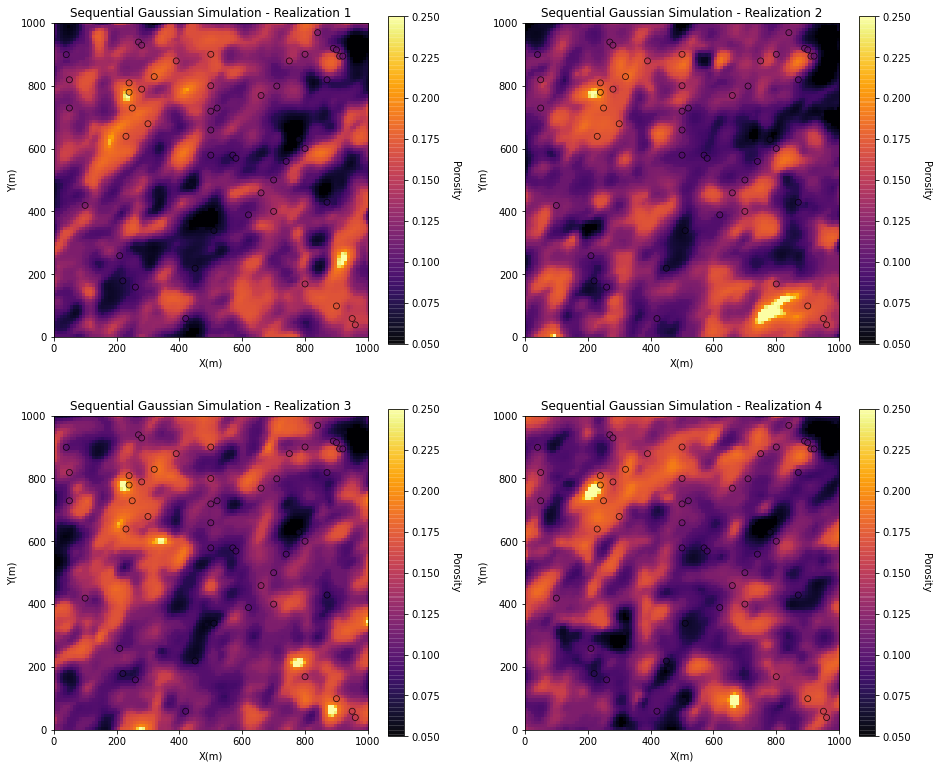

In [13]:
# Demonstration of Multiple Realizations - Long Continuity
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 20; radius = 100; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45,hmaj1=150,hmin1=100)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

Based on the four simulations, at a range of 500 - 800 Y(m) and 150 - 400 X(m) there is a higher porosity value withiuni that range as it lowers or gets larger, the porosity starts to drop as well. 

## Variogram 0.6


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
         conditional mean and stdev:  -5.427410870855554,0.0033795605946881227
         simulated value:    -5.427046424069794
   currently on node 4000
         conditional mean and stdev:  -5.249656014250285,0.0
         simulated value:    -5.249656014250285
         conditional mean and stdev:  -5.0114921372136205,0.0
         simulated value:    -5.0114921372136205
   currently on node 5000
         conditional mean and stdev:  -5.207184782683993,0.0001260720911321752
         si

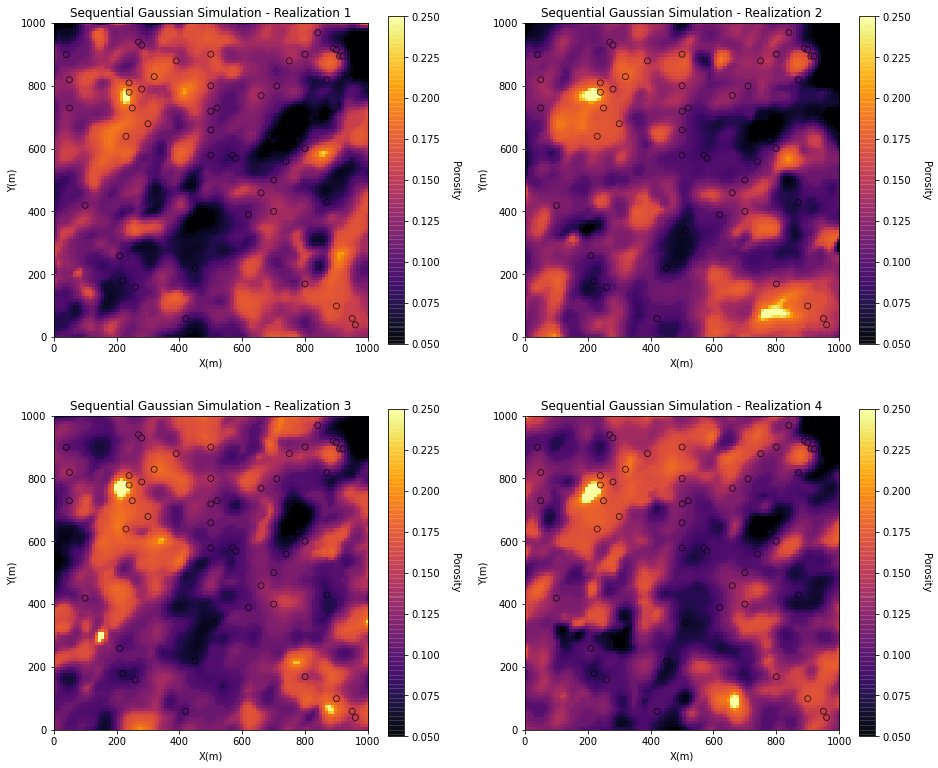

In [14]:
# Demonstration of Multiple Realizations - Short Continuity
# azi = 50, hmaj = 150 hmin1 = 150
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 100; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45,hmaj1=200,hmin1=150)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.099 (close to 0.0?)
                                   variance = 1.1504 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
         

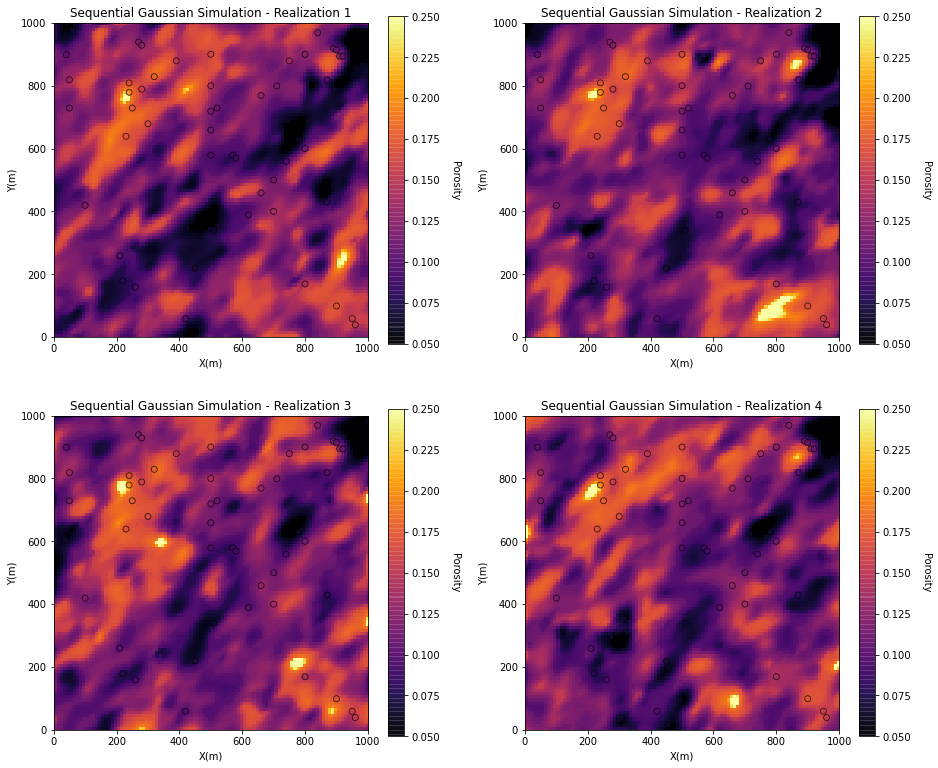

In [15]:
# Demonstration of Multiple Realizations - Long Continuity
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 20; radius = 100; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45,hmaj1=200,hmin1=100)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

Similar to previous simulation on ranges more towards 600 - 800 on y(x) and same range for X(m). Porosity seems high in those areas

## Variogram 0.8


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.1549 (close to 0.0?)
                                   variance = 0.9326 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
        

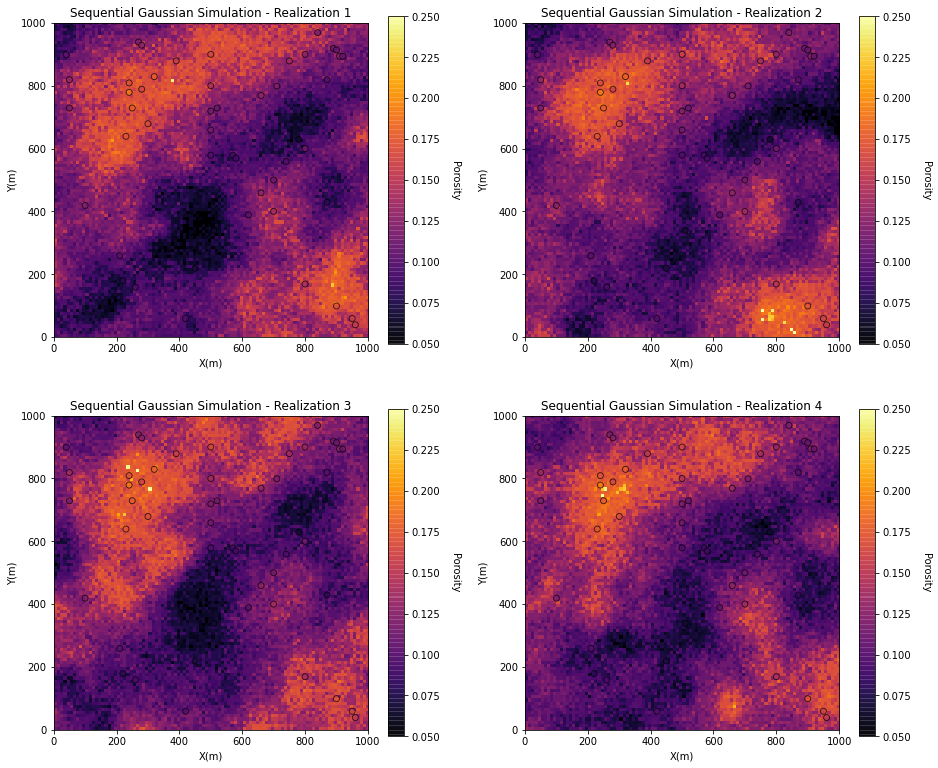

In [16]:
# Demonstration of Multiple Realizations - Short Continuity
# azi = 30, hmaj = 200 hmin1 = 50
# Vario = 0.8
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 300; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.1,nst=1,it1=3,cc1=0.9,azi1=45,hmaj1=300,hmin1=300)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.1549 (close to 0.0?)
                                   variance = 0.9326 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
        

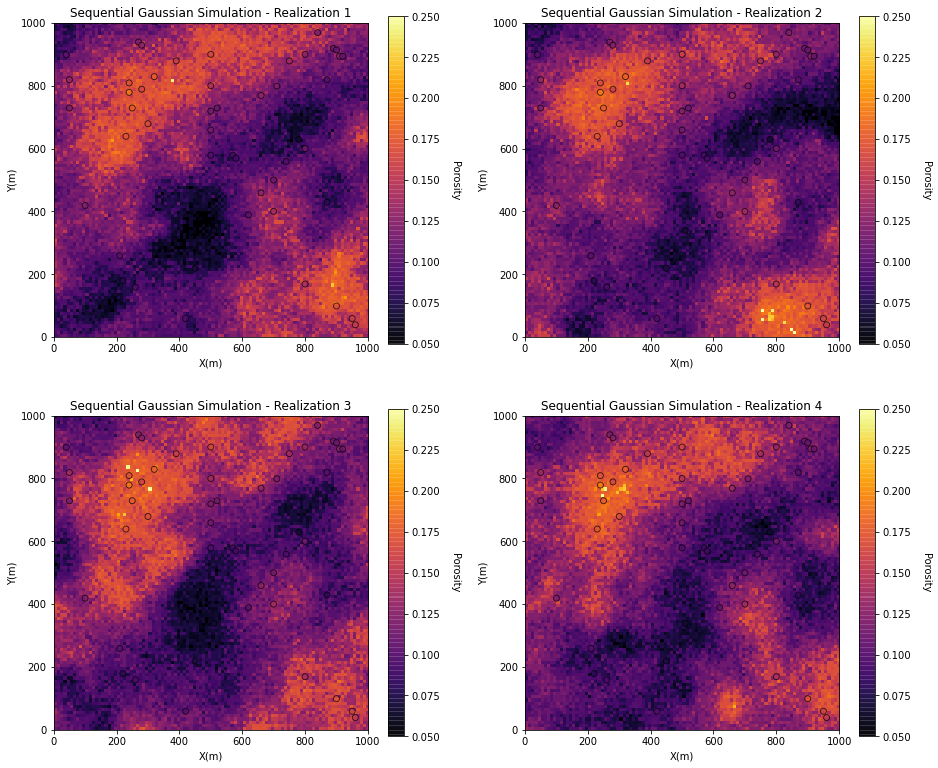

In [17]:
# Demonstration of Multiple Realizations - Short Continuity
# azi = 30, hmaj = 200 hmin1 = 50
# Vario = 0.8
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 10; radius = 300; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.1,nst=1,it1=3,cc1=0.9,azi1=45,hmaj1=300,hmin1=300)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()


 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
                 Weighted Average              = 0.1234
                 Weighted Variance             = 0.001
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9749
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = -0.0779 (close to 0.0?)
                                   variance = 0.8184 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 50
                 Number trimmed                = 0
        

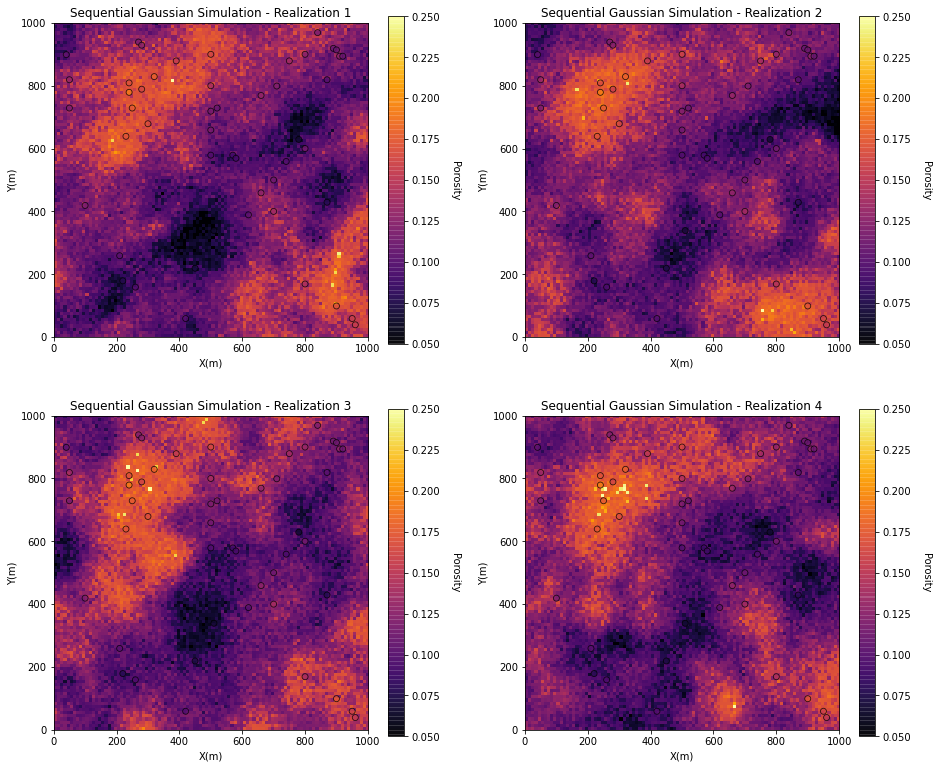

In [18]:
# Demonstration of Multiple Realizations - Long Continuity
nx = 100; ny = 100; xsiz = 10.0; ysiz = 10.0; xmn = 5.0; ymn = 5.0; nxdis = 1; nydis = 1
ndmin = 0; ndmax = 20; radius = 100; ktype = 0; skmean = 0
vario = GSLIB.make_variogram(nug=0.11,nst=1,it1=3,cc1=0.89,azi1=45,hmaj1=300,hmin1=300)
tmin = -999; tmax = 999

sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73072,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim3 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73071,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

sim4 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73070,
            ndmin=ndmin,ndmax=ndmax,nodmax=20,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=ktype,colocorr=0.0,sec_map=0,vario=vario)

xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; cmap = plt.cm.inferno
plt.subplot(221)
GSLIB.locpix_st(sim,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 1','X(m)','Y(m)','Porosity',cmap)

plt.subplot(222)
GSLIB.locpix_st(sim2,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 2','X(m)','Y(m)','Porosity',cmap)

plt.subplot(223)
GSLIB.locpix_st(sim3,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 3','X(m)','Y(m)','Porosity',cmap)

plt.subplot(224)
GSLIB.locpix_st(sim4,xmin,xmax,ymin,ymax,xsiz,0.05,0.25,df,'X','Y','Porosity','Sequential Gaussian Simulation - Realization 4','X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2)
plt.show()

## Scaling Variogram Values

Based on the parameters calculated for each variogram model 0.2, 0.4, 0.6 and 0.8, we apply those parameters by scaling them up * 8 to get rid of noise in our data (variogram model value will remain the same). Models are scaled by 100, 200, 500, and 1000 cells and create a new dataframe from those scales

In [39]:
def getindex(nc,cmn,csiz,loc):
    ic = min(int((loc - cmn) / csiz), nc - 1)
    return ic

def upscale(model,new_nx,new_ny):
    ny, nx = model.shape
    new_xsiz = nx/new_nx; new_xmn = new_xsiz * 0.5
    new_ysiz = ny/new_ny; new_ymn = new_ysiz * 0.5
    new_model = np.zeros((new_ny,new_nx)); count = np.zeros((new_ny,new_nx))
    for iy in range(0,ny):
        yloc = iy+0.5
        new_iy = getindex(new_ny,new_ymn,new_ysiz,yloc)
        for ix in range(0,nx):
            xloc = ix+0.5
            new_ix = getindex(new_nx,new_xmn,new_xsiz,xloc)
            new_model[new_iy,new_ix] = new_model[new_iy,new_ix] + model[iy,ix] 
            count[new_iy,new_ix] = count[new_iy,new_ix] + 1 
    for iny in range(0,new_ny):
        for inx in range(0,new_nx):
            if count[iny,inx] > 0:
                new_model[iny,inx] = new_model[iny,inx] / count[iny,inx]
    return new_model

def cellplt_st(array,xmin,xmax,ymin,ymax,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    im = plt.imshow(array,cmap,vmin=vmin,vmax=vmax,extent=[xmin, xmax, ymin, ymax])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.clim(vmin,vmax)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(vlabel, rotation=270, labelpad=20) 

In [40]:
df = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv")

In [41]:
nd = 100
df = pd.DataFrame(data = np.random.normal(loc=0.1,scale = 0.03,size=nd),columns=['Porosity'])
df['X'] = np.full(nd,-99999); df['Y'] = np.full(nd,-99999)
df.head()

,Porosity,X,Y
0,0.077446,-99999,-99999
1,0.124981,-99999,-99999
2,0.100988,-99999,-99999
3,0.079247,-99999,-99999
4,0.082503,-99999,-99999


In [42]:
nx = 100; ny = 100; xsiz = 100; ysiz = 100                        # grid number of cells and cell size
xmin = 0.0; ymin = 0.0;                                           # grid origin
xmax = xmin + nx * ysiz; ymax = ymin + ny * xsiz        # calculate the extent of model
xmn = xmin + 0.5 * xsiz; ymn = ymin + 0.5 * ysiz                  # grid origin, lower left corner
cmap = plt.cm.inferno                                             # color map for plotting 
vmin = 0.0; vmax = 0.2                                            # property min and max
tmin = -999; tmax = 999                                           # trimming limits
radius = 10000; ndmin = 0; ndmax = 10

### Variogram 0.2 and Variogram 0.4 scaled by 100, 200, 500, and 1000 m cells


 Data for SGSIM: Number of acceptable data     = 100
                 Number trimmed                = 0
                 Weighted Average              = 0.0987
                 Weighted Variance             = 0.0009
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9873
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0392 (close to 0.0?)
                                   variance = 0.9726 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 100
                 Number trimmed                = 0
      

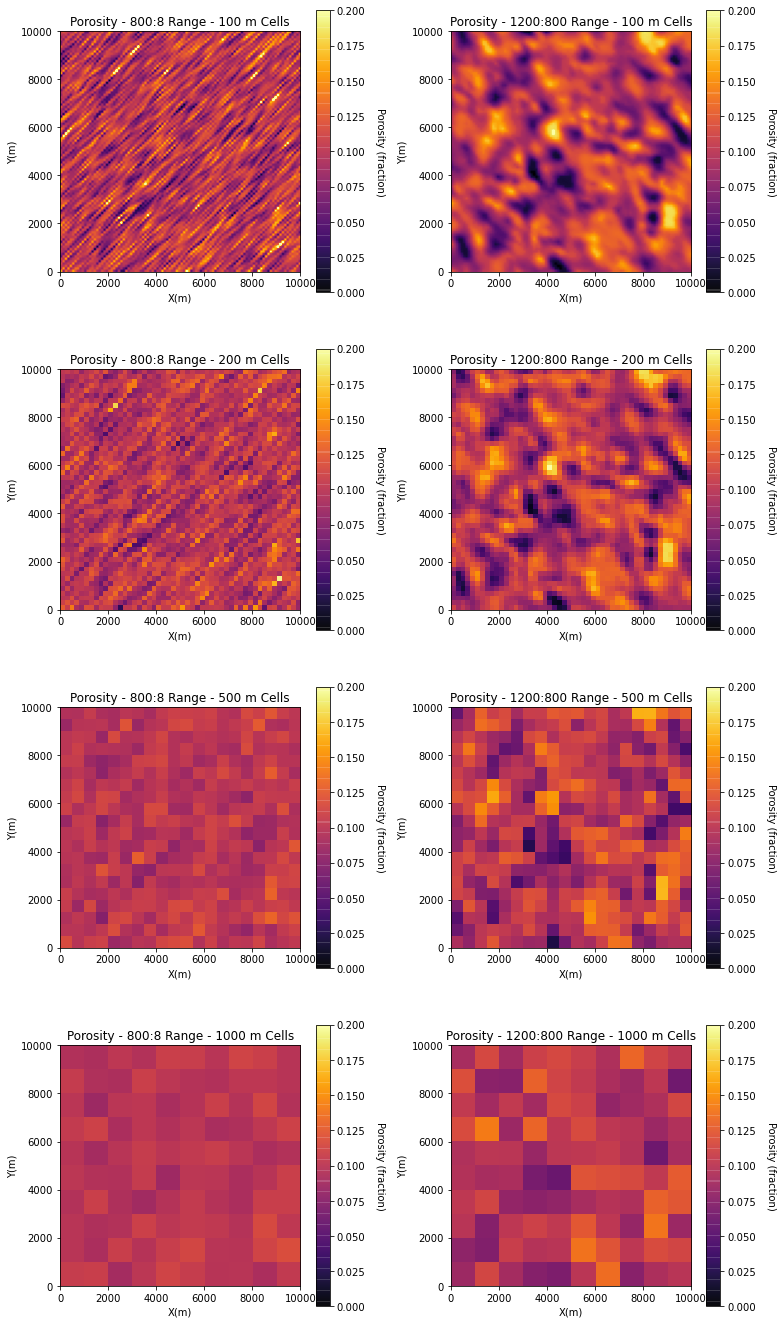

In [43]:
range_maj1 = 800; range_min1 = 8
range_maj2 = 1200; range_min2 = 800
# azi1=157.5,hmaj1=200,hmin1=190
vario1 = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45,hmaj1=range_maj1,hmin1=range_min1)

sim1 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=vario1)

sim1 = GSLIB.affine(sim1,.1,0.03)                                     # correct the distribution to a target mean and standard deviation.

vario2 = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=135.0,hmaj1=range_maj2,hmin1=range_min2)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=vario2)

sim2 = GSLIB.affine(sim2,.1,0.03)                                     # correct the distribution to a target mean and standard deviation.

plt.subplot(421)
GSLIB.pixelplt_st(sim1,xmin,xmax,ymin,ymax,xsiz,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(422)
GSLIB.pixelplt_st(sim2,xmin,xmax,ymin,ymax,xsiz,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

mid = upscale(sim1,new_nx = 50,new_ny = 50)
mid2 = upscale(sim2,new_nx = 50,new_ny = 50)

plt.subplot(423)
GSLIB.pixelplt_st(mid,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(424)
GSLIB.pixelplt_st(mid2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

midb = upscale(sim1,new_nx = 20,new_ny = 20)
midb2 = upscale(sim2,new_nx = 20,new_ny = 20)

plt.subplot(425)
GSLIB.pixelplt_st(midb,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(426)
GSLIB.pixelplt_st(midb2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

course = upscale(sim1,new_nx = 10,new_ny = 10)
course2 = upscale(sim2,new_nx = 10,new_ny = 10)

plt.subplot(427)
GSLIB.pixelplt_st(course,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 1000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(428)
GSLIB.pixelplt_st(course2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 1000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=4.5, wspace=0.3, hspace=0.2)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=300,bbox_inches="tight")
plt.show()

### Create dataframes ( specific y values will be constant)

#### Constant Y values (0, 100, 1000, 5000, 9900)

In [44]:
x, y = np.meshgrid(np.arange(0, xmax, nx), np.arange(0, ymax, ny))

In [45]:
x.shape

(100, 100)

In [46]:
# Non-scaled data 
d = {'x': x.flatten(), 'y': y.flatten(), 'Phi': sim1.flatten()}
df_sim1_v1 = pd.DataFrame(data=d)
#df_sim1_v1['y'].unique()

In [47]:
# Original
df_sim1_v1_0 = df_sim1_v1.loc[df_sim1_v1['y'] == 0]
# ff.loc[df['column_name'] == some_value]
df_sim1_v1_0.to_csv('datasets/orig_v1_0.csv', index=False)

In [32]:
df_sim1_v1_100 = df_sim1_v1.loc[df_sim1_v1['y'] == 100]
# ff.loc[df['column_name'] == some_value]
df_sim1_v1_100.to_csv('datasets/orig_v1_100.csv', index=False)

In [33]:
df_sim1_v1_200 = df_sim1_v1.loc[df_sim1_v1['y'] == 1000]
# ff.loc[df['column_name'] == some_value]
df_sim1_v1_200.to_csv('datasets/orig_v1_1000.csv', index=False)

In [34]:
df_sim1_v1_5000 = df_sim1_v1.loc[df_sim1_v1['y'] == 5000]
# ff.loc[df['column_name'] == some_value]
df_sim1_v1_5000.to_csv('datasets/orig_v1_5000.csv', index=False)

In [35]:
df_sim1_v1_9900 = df_sim1_v1.loc[df_sim1_v1['y'] == 9900]
# ff.loc[df['column_name'] == some_value]
df_sim1_v1_9900.to_csv('datasets/orig_v1_9900.csv', index=False)

#### Scaled 50 : Y constant (100, 1150, 5150, 9900)

In [29]:
x_new_50 = upscale(x,new_nx = 50,new_ny = 50) # Rescale x and y to 50
y_new_50 = upscale(y,new_nx = 50,new_ny = 50)
d = {'x': x_new_50.flatten(), 'y': y_new_50.flatten(), 'Phi': mid.flatten()}
df_v1_50 = pd.DataFrame(data=d)
df_v1_50

,x,y,Phi
0,100.0,100.0,0.101224
1,350.0,100.0,0.104718
2,550.0,100.0,0.099215
3,750.0,100.0,0.105023
4,950.0,100.0,0.081992
...,...,...,...
2495,9150.0,9900.0,0.080207
2496,9350.0,9900.0,0.096250
2497,9550.0,9900.0,0.126337
2498,9750.0,9900.0,0.106797


In [30]:
# 
df_v1_50_100 = df_v1_50.loc[df_v1_50['y'] == 100]
df_v1_50_100.to_csv('datasets/scaled_v1_50_100.csv', index=False)

In [31]:
df_v1_50_100 = df_v1_50.loc[df_v1_50['y'] == 1150]
df_v1_50_100.to_csv('datasets/scaled_v1_50_115.csv', index=False)

In [32]:
df_v1_50_515 = df_v1_50.loc[df_v1_50['y'] == 5150]
df_v1_50_515.to_csv('datasets/scaled_v1_50_515.csv', index=False)

In [33]:
df_v1_50_999 = df_v1_50.loc[df_v1_50['y'] == 9900]
df_v1_50_999.to_csv('datasets/scaled_v1_50_999.csv', index=False)

#### Scaled 20 : Y constant (300, 4900, 9800)

In [34]:
x_new_50 = upscale(x,new_nx = 20,new_ny = 20) # Rescale x and y to 50
y_new_50 = upscale(y,new_nx = 20,new_ny = 20)
d = {'x': x_new_50.flatten(), 'y': y_new_50.flatten(), 'Phi': midb.flatten()}
df_v1_20 = pd.DataFrame(data=d)

In [35]:
df_v1_50_100 = df_v1_20.loc[df_v1_20['y'] == 300]
df_v1_50_100.to_csv('datasets/scaled_v1_20_300.csv', index=False)

In [36]:
df_v1_50_100 = df_v1_20.loc[df_v1_20['y'] == 4900]
df_v1_50_100.to_csv('datasets/scaled_v1_20_490.csv', index=False)

In [37]:
df_v1_50_100 = df_v1_20.loc[df_v1_20['y'] == 9800]
df_v1_50_100.to_csv('datasets/scaled_v1_20_980.csv', index=False)

#### Scaled 10 : Y constant (700, 4950, 9700)

In [38]:
x_new_10 = upscale(x,new_nx = 10,new_ny = 10) # Rescale x and y to 10
y_new_10 = upscale(y,new_nx = 10,new_ny = 10)
d = {'x': x_new_10.flatten(), 'y': y_new_10.flatten(), 'Phi': course.flatten()}
df_v1_10 = pd.DataFrame(data=d)
df_v1_10['y'].unique()

array([ 700., 1950., 2950., 3950., 4950., 5950., 6950., 7950., 8950.,
       9700.])

In [39]:
df_v1_50_100 = df_v1_10.loc[df_v1_10['y'] == 700]
df_v1_50_100.to_csv('datasets/scaled_v1_10_700.csv', index=False)

In [40]:
df_v1_50_100 = df_v1_10.loc[df_v1_10['y'] == 4950]
df_v1_50_100.to_csv('datasets/scaled_v1_10_495.csv', index=False)

In [41]:
df_v1_50_100 = df_v1_10.loc[df_v1_10['y'] == 9700]
df_v1_50_100.to_csv('datasets/scaled_v1_10_970.csv', index=False)

#### Non-scaled : Y constant (0, 100, 1000, 5000, 9900)

In [36]:
# Simulation 2
d = {'x': x.flatten(), 'y': y.flatten(), 'Phi': sim2.flatten()}
df_sim2_v1 = pd.DataFrame(data=d)

In [48]:
# Original
df_sim2_v1_0 = df_sim2_v1.loc[df_sim2_v1['y'] == 0]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_0.to_csv('datasets/orig_sim2_0.csv', index=False)
df_sim2_v1_100 = df_sim2_v1.loc[df_sim2_v1['y'] == 100]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_100.to_csv('datasets/orig_sim2_100.csv', index=False)
df_sim2_v1_200 = df_sim2_v1.loc[df_sim2_v1['y'] == 1000]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_200.to_csv('datasets/orig_sim2_1000.csv', index=False)
df_sim2_v1_5000 = df_sim2_v1.loc[df_sim2_v1['y'] == 5000]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_5000.to_csv('datasets/orig_sim2_5000.csv', index=False)
df_sim2_v1_9900 = df_sim2_v1.loc[df_sim2_v1['y'] == 9900]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_9900.to_csv('datasets/orig_sim2_9900.csv', index=False)

#### Scaled 50 : Y constant (100, 1150, 5150, 9900)

In [26]:
x_new_50 = upscale(x,new_nx = 50,new_ny = 50) # Rescale x and y to 50
y_new_50 = upscale(y,new_nx = 50,new_ny = 50)
d = {'x': x_new_50.flatten(), 'y': y_new_50.flatten(), 'Phi': mid2.flatten()}
df_v2_50 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_50.loc[df_v2_50['y'] == 100]
df_v2_50_100.to_csv('datasets/scaled_v2_50_100.csv', index=False)
df_v2_50_115 = df_v2_50.loc[df_v2_50['y'] == 1150]
df_v2_50_115.to_csv('datasets/scaled_v2_50_115.csv', index=False)
df_v2_50_515 = df_v2_50.loc[df_v2_50['y'] == 5150]
df_v2_50_515.to_csv('datasets/scaled_v2_50_515.csv', index=False)
df_v2_50_999 = df_v2_50.loc[df_v2_50['y'] == 9900]
df_v2_50_999.to_csv('datasets/scaled_v2_50_999.csv', index=False)

#### Scaled 20 : Y constant (300, 4900, 9800)

In [45]:
x_new_20 = upscale(x,new_nx = 20,new_ny = 20) # Rescale x and y to 20
y_new_20 = upscale(y,new_nx = 20,new_ny = 20)
d = {'x': x_new_20.flatten(), 'y': y_new_20.flatten(), 'Phi': midb2.flatten()}
df_v2_20 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 300]
df_v2_50_100.to_csv('datasets/scaled_v2_20_300.csv', index=False)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 4900]
df_v2_50_100.to_csv('datasets/scaled_v2_20_490.csv', index=False)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 9800]
df_v2_50_100.to_csv('datasets/scaled_v2_20_980.csv', index=False)

#### Scaled 10 : Y constant (700, 4950,  9700)

In [46]:
x_new_10 = upscale(x,new_nx = 10,new_ny = 10) # Rescale x and y to 10
y_new_10 = upscale(y,new_nx = 10,new_ny = 10)
d = {'x': x_new_10.flatten(), 'y': y_new_10.flatten(), 'Phi': course2.flatten()}
df_v2_10 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 700]
df_v2_50_100.to_csv('datasets/scaled_v2_10_700.csv', index=False)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 4950]
df_v2_50_100.to_csv('datasets/scaled_v2_10_495.csv', index=False)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 9700]
df_v2_50_100.to_csv('datasets/scaled_v2_10_970.csv', index=False)

## Variogram 0.6 and Variogram 0.8 scaled by 100, 200, 500, and 1000 m cells


 Data for SGSIM: Number of acceptable data     = 100
                 Number trimmed                = 0
                 Weighted Average              = 0.0987
                 Weighted Variance             = 0.0009
                 Weighted Transformed Average  = 0.0
                 Weighted Transformed Variance = 0.9873
Setting up rotation matrices for variogram and search
Working on realization number 0
   currently on node 0
   currently on node 1000
   currently on node 2000
   currently on node 3000
   currently on node 4000
   currently on node 5000
   currently on node 6000
   currently on node 7000
   currently on node 8000
   currently on node 9000
Reassigning data to nodes

 Realization 0: number   = 10000
                                   mean     = 0.0109 (close to 0.0?)
                                   variance = 0.7654 (close to gammabar(V,V)? approx. 1.0)

 Data for SGSIM: Number of acceptable data     = 100
                 Number trimmed                = 0
      

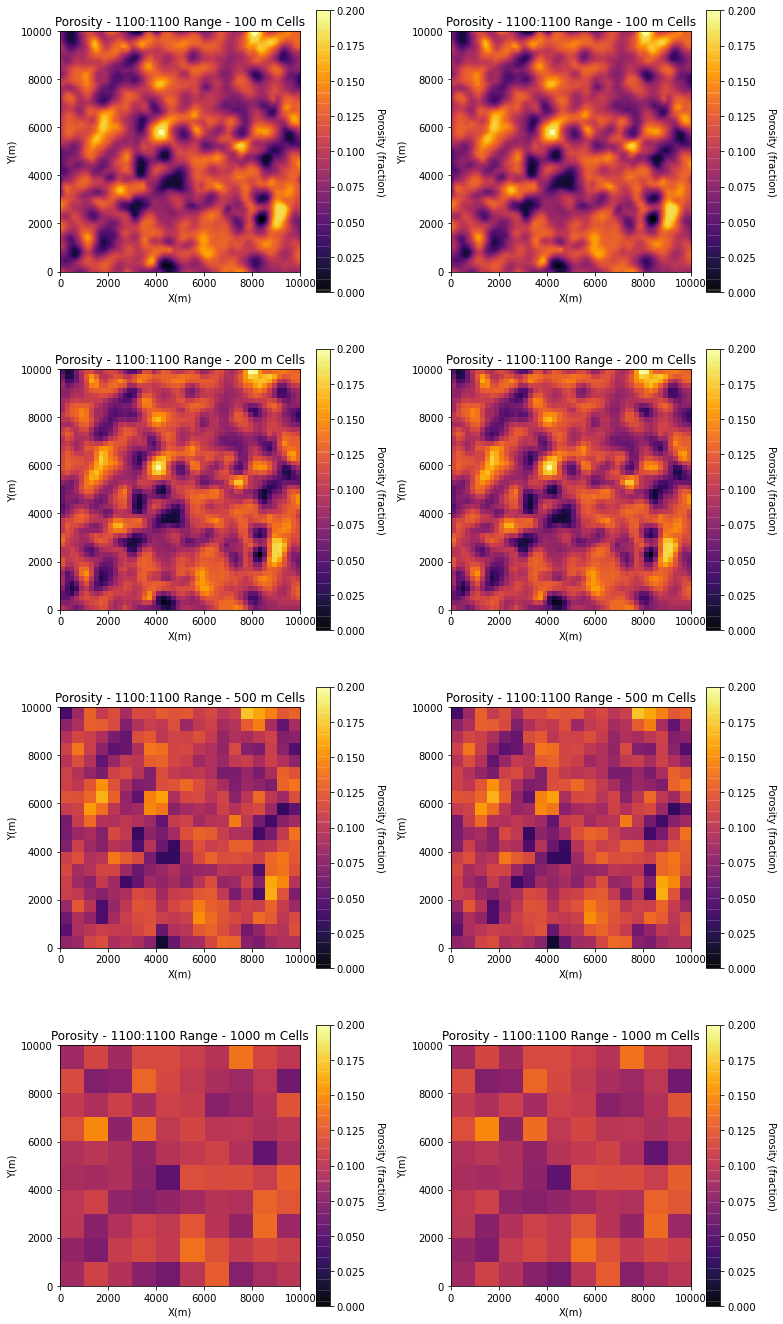

In [63]:
range_maj1 = 1100; range_min1 = 1100
range_maj2 = 1100; range_min2 = 1100
# azi1=157.5,hmaj1=200,hmin1=190
vario1 = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45,hmaj1=range_maj1,hmin1=range_min1)

sim1 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=vario1)

sim1 = GSLIB.affine(sim1,.1,0.03)                                     # correct the distribution to a target mean and standard deviation.

vario2 = GSLIB.make_variogram(nug=0.0,nst=1,it1=3,cc1=1.0,azi1=45.0,hmaj1=range_maj2,hmin1=range_min2)

sim2 = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=0.0,zmax=0.3,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=ndmin,ndmax=ndmax,nodmax=10,mults=0,nmult=2,noct=-1,radius=radius,radius1=1,sang1=0,
            mxctx=10,mxcty=10,ktype=0,colocorr=0.0,sec_map=0,vario=vario2)

sim2 = GSLIB.affine(sim2,.1,0.03)                                     # correct the distribution to a target mean and standard deviation.

plt.subplot(421)
GSLIB.pixelplt_st(sim1,xmin,xmax,ymin,ymax,xsiz,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(422)
GSLIB.pixelplt_st(sim2,xmin,xmax,ymin,ymax,xsiz,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 100 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

mid = upscale(sim1,new_nx = 50,new_ny = 50)
mid2 = upscale(sim2,new_nx = 50,new_ny = 50)

plt.subplot(423)
GSLIB.pixelplt_st(mid,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(424)
GSLIB.pixelplt_st(mid2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 200 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

midb = upscale(sim1,new_nx = 20,new_ny = 20)
midb2 = upscale(sim2,new_nx = 20,new_ny = 20)

plt.subplot(425)
GSLIB.pixelplt_st(midb,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(426)
GSLIB.pixelplt_st(midb2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 500 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

course = upscale(sim1,new_nx = 10,new_ny = 10)
course2 = upscale(sim2,new_nx = 10,new_ny = 10)

plt.subplot(427)
GSLIB.pixelplt_st(course,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj1) + ':' + str(range_min1) + ' Range - 1000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplot(428)
GSLIB.pixelplt_st(course2,xmin,xmax,ymin,ymax,-1,0,.2,'Porosity - ' + str(range_maj2) + ':' + str(range_min2) + ' Range - 1000 m Cells',"X(m)","Y(m)","Porosity (fraction)",cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=4.5, wspace=0.3, hspace=0.2)
#plt.savefig('F4_Eg_EUR_Real_Pad.tif',dpi=300,bbox_inches="tight")
plt.show()

#### Constant Y values (0, 100, 1000, 5000, 9900)

In [64]:
# Simulation 3 original
d = {'x': x.flatten(), 'y': y.flatten(), 'Phi': sim1.flatten()}
df_sim3_v1 = pd.DataFrame(data=d)
# df_sim3_v1.to_csv('datasets/sim3_org.csv', index=False)

In [65]:
df_sim2_v1_0 = df_sim3_v1.loc[df_sim3_v1['y'] == 0]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_0.to_csv('datasets/orig_sim3_0.csv', index=False)
df_sim2_v1_100 = df_sim3_v1.loc[df_sim3_v1['y'] == 100]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_100.to_csv('datasets/orig_sim3_100.csv', index=False)
df_sim2_v1_200 = df_sim3_v1.loc[df_sim3_v1['y'] == 1000]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_200.to_csv('datasets/orig_sim3_1000.csv', index=False)
df_sim2_v1_5000 = df_sim3_v1.loc[df_sim3_v1['y'] == 5000]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_5000.to_csv('datasets/orig_sim3_5000.csv', index=False)
df_sim2_v1_9900 = df_sim3_v1.loc[df_sim3_v1['y'] == 9900]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_9900.to_csv('datasets/orig_sim3_9900.csv', index=False)

#### Scaled 50: Y values (100, 1150, 5150, 9900)

In [72]:
x_new_50 = upscale(x,new_nx = 50,new_ny = 50) # Rescale x and y to 50
y_new_50 = upscale(y,new_nx = 50,new_ny = 50)
d = {'x': x_new_50.flatten(), 'y': y_new_50.flatten(), 'Phi': mid.flatten()}
df_v2_50 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_50.loc[df_v2_50['y'] == 100]
df_v2_50_100.to_csv('datasets/scaled_v3_50_100.csv', index=False)
df_v2_50_115 = df_v2_50.loc[df_v2_50['y'] == 1150]
df_v2_50_115.to_csv('datasets/scaled_v3_50_115.csv', index=False)
df_v2_50_515 = df_v2_50.loc[df_v2_50['y'] == 5150]
df_v2_50_515.to_csv('datasets/scaled_v3_50_515.csv', index=False)
df_v2_50_999 = df_v2_50.loc[df_v2_50['y'] == 9900]
df_v2_50_999.to_csv('datasets/scaled_v3_50_999.csv', index=False)

#### Scaled 20: Y values (300, 4900, 9800)

In [51]:
x_new_20 = upscale(x,new_nx = 20,new_ny = 20) # Rescale x and y to 20
y_new_20 = upscale(y,new_nx = 20,new_ny = 20)
d = {'x': x_new_20.flatten(), 'y': y_new_20.flatten(), 'Phi': midb.flatten()}
df_v2_20 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 300]
df_v2_50_100.to_csv('datasets/scaled_v3_20_300.csv', index=False)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 4900]
df_v2_50_100.to_csv('datasets/scaled_v3_20_490.csv', index=False)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 9800]
df_v2_50_100.to_csv('datasets/scaled_v3_20_980.csv', index=False)

#### Scaled 10: Y values (700, 4950, 9700)

In [52]:
x_new_10 = upscale(x,new_nx = 10,new_ny = 10) # Rescale x and y to 10
y_new_10 = upscale(y,new_nx = 10,new_ny = 10)
d = {'x': x_new_10.flatten(), 'y': y_new_10.flatten(), 'Phi': course.flatten()}
df_v2_10 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 700]
df_v2_50_100.to_csv('datasets/scaled_v3_10_700.csv', index=False)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 4950]
df_v2_50_100.to_csv('datasets/scaled_v3_10_495.csv', index=False)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 9700]
df_v2_50_100.to_csv('datasets/scaled_v3_10_970.csv', index=False)

#### Constant Y values (0, 100, 1000, 5000, 9900)

In [53]:
# simulation 4 orignial
d = {'x': x.flatten(), 'y': y.flatten(), 'Phi': sim2.flatten()}
df_sim4_v1 = pd.DataFrame(data=d)
# df_sim4_v1.to_csv('datasets/sim4_org.csv', index=False)

In [54]:
df_sim2_v1_0 = df_sim4_v1.loc[df_sim4_v1['y'] == 0]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_0.to_csv('datasets/orig_sim4_0.csv', index=False)
df_sim2_v1_100 = df_sim4_v1.loc[df_sim4_v1['y'] == 100]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_100.to_csv('datasets/orig_sim4_100.csv', index=False)
df_sim2_v1_200 = df_sim4_v1.loc[df_sim4_v1['y'] == 1000]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_200.to_csv('datasets/orig_sim4_1000.csv', index=False)
df_sim2_v1_5000 = df_sim4_v1.loc[df_sim4_v1['y'] == 5000]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_5000.to_csv('datasets/orig_sim4_5000.csv', index=False)
df_sim2_v1_9900 = df_sim4_v1.loc[df_sim4_v1['y'] == 9900]
# ff.loc[df['column_name'] == some_value]
df_sim2_v1_9900.to_csv('datasets/orig_sim4_9900.csv', index=False)

#### Scaled 50: Y values (100, 1150, 5150, 9900)

In [55]:
x_new_50 = upscale(x,new_nx = 50,new_ny = 50) # Rescale x and y to 50
y_new_50 = upscale(y,new_nx = 50,new_ny = 50)
d = {'x': x_new_50.flatten(), 'y': y_new_50.flatten(), 'Phi': mid2.flatten()}
df_v2_50 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_50.loc[df_v2_50['y'] == 100]
df_v2_50_100.to_csv('datasets/scaled_v4_50_100.csv', index=False)
df_v2_50_115 = df_v2_50.loc[df_v2_50['y'] == 1150]
df_v2_50_115.to_csv('datasets/scaled_v4_50_115.csv', index=False)
df_v2_50_515 = df_v2_50.loc[df_v2_50['y'] == 5150]
df_v2_50_515.to_csv('datasets/scaled_v4_50_515.csv', index=False)
df_v2_50_999 = df_v2_50.loc[df_v2_50['y'] == 9900]
df_v2_50_999.to_csv('datasets/scaled_v4_50_999.csv', index=False)

#### Scaled 20: Y values (300, 4900, 9800)

In [56]:
x_new_20 = upscale(x,new_nx = 20,new_ny = 20) # Rescale x and y to 20
y_new_20 = upscale(y,new_nx = 20,new_ny = 20)
d = {'x': x_new_20.flatten(), 'y': y_new_20.flatten(), 'Phi': midb2.flatten()}
df_v2_20 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 300]
df_v2_50_100.to_csv('datasets/scaled_v4_20_300.csv', index=False)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 4900]
df_v2_50_100.to_csv('datasets/scaled_v4_20_490.csv', index=False)
df_v2_50_100 = df_v2_20.loc[df_v2_20['y'] == 9800]
df_v2_50_100.to_csv('datasets/scaled_v4_20_980.csv', index=False)

#### Scaled 10: Y values (700, 4950, 9700)

In [57]:
x_new_10 = upscale(x,new_nx = 10,new_ny = 10) # Rescale x and y to 10
y_new_10 = upscale(y,new_nx = 10,new_ny = 10)
d = {'x': x_new_10.flatten(), 'y': y_new_10.flatten(), 'Phi': course2.flatten()}
df_v2_10 = pd.DataFrame(data=d)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 700]
df_v2_50_100.to_csv('datasets/scaled_v4_10_700.csv', index=False)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 4950]
df_v2_50_100.to_csv('datasets/scaled_v4_10_495.csv', index=False)
df_v2_50_100 = df_v2_10.loc[df_v2_10['y'] == 9700]
df_v2_50_100.to_csv('datasets/scaled_v4_10_970.csv', index=False)

***************************************************************************************
*    Title: Sequential Gaussian Simulation for Geostatistical Realizations
*    Author: Michael J Pyrcz
*    Date: 2018
*    Code version: 6.0
*    Availability: https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_simulation.ipynb

***************************************************************************************
